## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

    1. Which variables are significant in predicting the price of a house, and
    2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
#Lets import the necessary/required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import GridSearchCV

In [2]:
#Lets read the dataset into the dataframe named 'housing'

housing = pd.read_csv('train.csv')

In [3]:
#lets read the first 5 rows of the dataframe to see how the dataframe looks like
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Lets get complete information about the dataframe to see the data type of the variables and the null values, if any.

housing.info()

#Based on the below information, its clear that the dataset contains null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Lets create a copy of 'housing' dataframe into a new dataframe 'house_price' so that the 'housing' datafame
#is not changed due to inaplce operation, if any.

house_price = housing

In [6]:
#Lets check the shape of 'housing_price' dataframe
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Handling missing values

In [8]:
#So, lets handle the missing values

#lets see the count of null values present in each column of the dataframe 'housing'

house_price.isna().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

In [9]:
#Lets print the missing values percentage-wise
round((housing.isna().sum()/housing.shape[0]*100),2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

In [10]:
#Not all the columns have missing values. Lets get the count of the columns having msising values

missing_values = house_price.isna().sum()

#Lets filter the columns

final_missing_values = missing_values[missing_values>=1]
print("Total columns having 1 or more missing values are:",len(final_missing_values))

Total columns having 1 or more missing values are: 19


In [11]:
#lets handle the columns having missing values one by one and determine wheteher to consider the
#each of the variables for the furrther analysis or not.

#PoolQC 

#Lets check the distribution of unique values in 'PoolQC' column

house_price['PoolQC'].value_counts()

#These are a total of '1453' missing values in it, it doesnt make sense to consider this columns.

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

#### Therefore, the below columns are useless for the further analysis as they contain more than 80% of the mssing values. So, its better to get rid of these columns.

PoolQC          
MiscFeature     
Alley           
Fence           


In [12]:
house_price.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [13]:
#Lets check the shape of the dataframe after deleting the 4 columns
house_price.shape

(1460, 77)

In [14]:
#Updated list of columns having missing values
house_price.isna().sum().sort_values(ascending=False).head(20)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
dtype: int64

In [15]:
housing.shape[1]

77

#### Lets handle FireplaceQu

In [16]:
house_price['FireplaceQu'].value_counts()

#This columns has a total of 690 missing values and 770 present values. It doesnt make sense to remove this column,
#hence, its better to replace the missing values in with Not Available


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [17]:
house_price['FireplaceQu'].fillna('Not Available',inplace=True)

In [18]:
house_price.FireplaceQu.dtype

dtype('O')

In [19]:
#Now, lets check the vlaues distribution in 'FireplaceQu' column 

house_price['FireplaceQu'].value_counts()

Not Available    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

In [20]:
house_price['FireplaceQu'].isna().sum()

#No missing value present in FireplaceQu column now.

0

#### Lets handle LotFrontage

In [21]:
#LotFrontage is of float type. lets check its distribution.
house_price['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

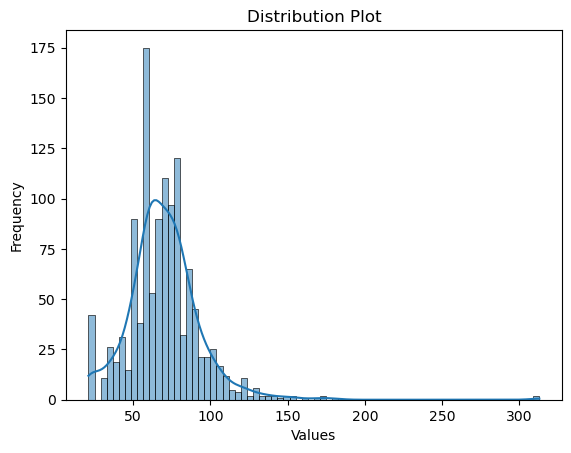

In [22]:
#There are 259 missing value in this column. Lets determine how to impute the missing values

import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(house_price.LotFrontage,kde=True)
plt.title("Distribution Plot")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

#As we can see that the ditrivution is right skewed. Hence, using the median of this column to impute missing
#values will be a good choice.

In [23]:
house_price['LotFrontage'].fillna(house_price['LotFrontage'].median(),inplace=True)

In [24]:
house_price.LotFrontage.dtype

dtype('float64')

In [25]:
#Lets check the count of missing values now in LotFrontage
housing['LotFrontage'].isna().sum()

0

#### Lets handle the below columns having mssing values

GarageType         81<br>
GarageYrBlt        81<br>
GarageFinish       81<br>
GarageQual         81<br>
GarageCond         81

All the above columns are of object data type except GarageYrBlt which is of float type.<br>
#So, lets impute the missing values in all the above columns except GarageYrBlt

In [26]:
#Lets check the distribution for 'GarageType'

house_price['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
house_price['GarageType'].fillna('Not Available',inplace=True)

In [28]:
#Lets check the distribution for 'GarageFinish'

house_price['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [29]:
#imputing for missing value

house_price['GarageFinish'].fillna('Not Available',inplace=True)

In [30]:
#Lets check the distribution for 'GarageQual'

house_price['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [31]:
#Imputing missing values with 'Not Available'
house_price['GarageQual'].fillna('Not Available',inplace=True)

In [32]:
#Lets check the distribution for 'GarageCond'
house_price['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [33]:
#Imputing missing values with 'Not Available'
house_price['GarageCond'].fillna('Not Available',inplace=True)

In [34]:
house_price.GarageCond.dtype

dtype('O')

#### Lets handle GarageYrBlt

In [35]:
#Lets see the distribution for GarageYrBlt
house_price['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

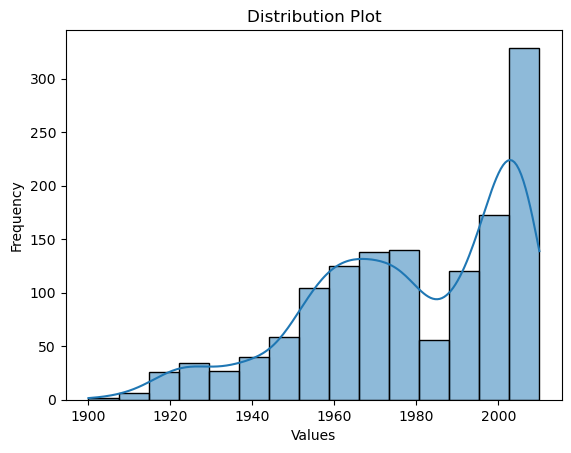

In [36]:
#There are 81 missing value in this column. Lets determine how to impute the missing values

sns.histplot(house_price.GarageYrBlt,kde=True)
plt.title("Distribution Plot")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

#As we can see that the ditribution is LEFT skewed. However, using the median of this column to impute
#missing values may replace all the missing values with the mean of the column which may or may be the correct
#year in which the garage was built.

#So, to be on the safer side, lets put it to 0.

In [37]:
house_price['GarageYrBlt'].fillna(0,inplace=True)
house_price['GarageYrBlt'].isna().sum()

0

In [38]:
#Lets verify the count of 0 values 
len(house_price[house_price['GarageYrBlt']==0])

81

In [39]:
#Updated list of columns having missing values
house_price.isna().sum().sort_values(ascending=False).head(10)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
HalfBath         0
BedroomAbvGr     0
dtype: int64

#### Let handle the below columns:

BsmtFinType2    38    object<br>
BsmtExposure    38    object<br>
BsmtFinType1    37    object<br>
BsmtQual        37    object<br>
BsmtCond        37    object

#All of the above columns are of object type. So, lets impute the missing values in all the above columns.

In [40]:
#Lets see the distribution of each of these columns one by one and impute the missing values

house_price['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [41]:
#Lets see the distribution of BsmtExposure
house_price['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [42]:
#Lets see the distribution of BsmtFinType1
house_price['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [43]:
#Lets see the distribution of BsmtQual
house_price['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [44]:
#Lets see the distribution of BsmtCond
house_price['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [45]:
house_price['BsmtFinType2'].fillna('Not Available',inplace=True)
house_price['BsmtExposure'].fillna('Not Available',inplace=True)
house_price['BsmtFinType1'].fillna('Not Available',inplace=True)
house_price['BsmtQual'].fillna('Not Available',inplace=True)
house_price['BsmtCond'].fillna('Not Available',inplace=True)

In [46]:
#Updated list of columns having missing values
house_price.isna().sum().sort_values(ascending=False).head(10)

MasVnrType      8
MasVnrArea      8
Electrical      1
BedroomAbvGr    0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
dtype: int64

#### Lets handle the columns

MasVnrType      8  object<br>
MasVnrArea      8  float

In [47]:
#MasVnrType is of object type. Lets check the distribution of its values.

house_price['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [48]:
#This column contains distribution of 864 None values. Let use None for the missing values.

house_price['MasVnrType'].fillna('None',inplace=True)

In [49]:
house_price['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

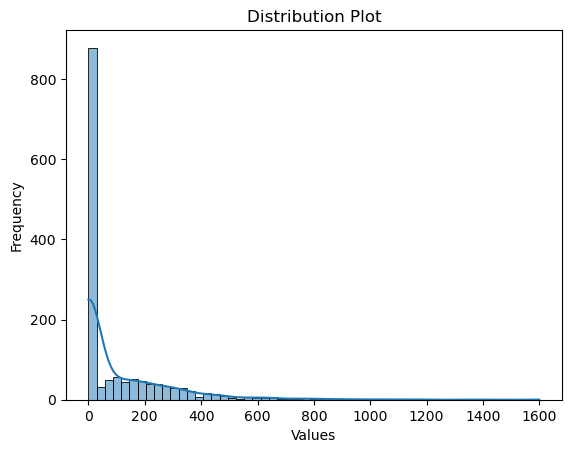

In [50]:
#MasVnrArea is of float type. Lets check the distribution of its values.

sns.histplot(house_price.MasVnrArea,kde=True)
plt.title("Distribution Plot")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

#There are 8 missing value in this column. Lets determine how to impute the missing values

#As we can see that the ditribution is Right skewed. Lets impute the missing values with the mean of
#the column.

In [51]:
##MasVnrArea contains 8 missing values
house_price['MasVnrArea'].fillna(house_price['MasVnrArea'].median(),inplace=True)

In [52]:
house_price.MasVnrArea.dtype

dtype('float64')

In [53]:
#Updated list of columns having missing values
house_price.isna().sum().sort_values(ascending=False).head(10)

Electrical      1
Id              0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
dtype: int64

#### Lets handle the column Electrical

In [54]:
#This column is of object type. Lets check the distribution of its values.
house_price['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [55]:
#Since Electrical is a categorical column, lets replace missing values with the mode,
#i.e. with the value that appears most frequently in the column.

house_price['Electrical'].fillna(house_price['Electrical'].mode()[0],inplace=True)

In [56]:
house_price.Electrical.dtype

dtype('O')

In [57]:
#Lets remove ID column, it is useless for the further analysis
house_price.drop('Id',axis=1,inplace=True)

In [58]:
#Updated list of columns having missing values
house_price.isna().sum().sort_values(ascending=False).head(20)

#So, there is no missing value in the datarame now.

MSSubClass      0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
MSZoning        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageYrBlt     0
dtype: int64

### Standardising Values (change the variables to correct types)

In [59]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [60]:
#Lets select the columns having numerical values (int or float datatypes)

house_price.select_dtypes(['int64','float64']).dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [61]:
#Lets see the relation of YearBuilt, YearRemodAdd, YrSold with SalePrice

#YearBuilt should be less than YrSold
#YearBuilt should be less than YearRemodAdd
#YearRemodAdd should be less than YrSold

(house_price['YearBuilt'] > house_price['YrSold']).sum()

0

In [62]:
#YearBuilt should be less than YearRemodAdd
(house_price['YearBuilt'] > house_price['YearRemodAdd']).sum()

0

In [63]:
#YearRemodAdd should be less than YrSold
(house_price['YearRemodAdd'] > house_price['YrSold']).sum()

#There is a row in the dataframe where YearRemodAdd in greater than YrSold which actually shouldnt happen, i.e.
#the property is remodelled after seeling it which doesnt make sense. Lets remove/drop this row.

1

In [64]:
#Lets remove this row and update the dataframe
house_price = house_price[house_price['YearRemodAdd'] <= house_price['YrSold']]
house_price.shape

(1459, 76)

In [65]:
#Lets see the relation of YearBuilt, YearRemodAdd, YrSold with SalePrice

house_price['house_age'] = house_price['YrSold'] - house_price['YearBuilt']
house_price.shape

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\3534317511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price['house_age'] = house_price['YrSold'] - house_price['YearBuilt']


(1459, 77)

In [66]:
house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

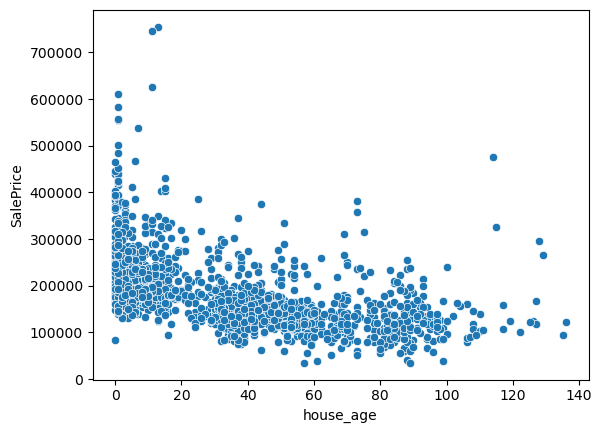

In [67]:
#Lets see the relationship of house_age vs SalePrice

sns.scatterplot(x = house_price.house_age, y = house_price.SalePrice)
plt.show()

#The relationship is not too strong. 

In [68]:
#Lets define the age in terms of YearRemodAdd, YrSold

house_price['house_age_remod'] = house_price['YrSold'] - house_price['YearRemodAdd']
house_price.shape

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\3105749464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price['house_age_remod'] = house_price['YrSold'] - house_price['YearRemodAdd']


(1459, 78)

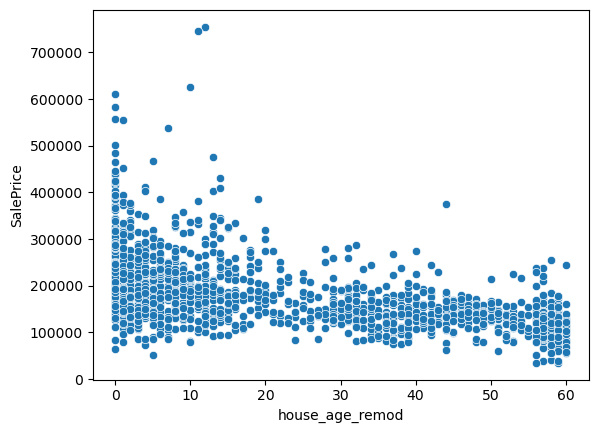

In [69]:
#Lets see the relationship of house_age_remod vs SalePrice

sns.scatterplot(x = house_price.house_age_remod, y = house_price.SalePrice)
plt.show()

#The variable house_age_remod is negatively correlated with Saleprice. Let consider this for the further analysis.

#### As we have identified the age of the property, lets drop the columns including
YearBuilt, YearRemodAdd, YrSold and house_age

In [70]:
house_price.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'house_age'],inplace=True, axis=1)
house_price.shape

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\1410139336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'house_age'],inplace=True, axis=1)


(1459, 74)

#### Lets check and drop the columns, if any, which are highly biased means the the columns in which a single value or a very small set of values appears most. Let take the threshold in-between 80-90, say 85%

In [71]:
#Lets create a list of dataframe columns
df_cols = house_price.select_dtypes(['int64','float64','object']).columns
len(df_cols)

#So, df_cols contains 75 columns of the dataframe

74

In [72]:
#lets create an empty dictionary 'bias_cols'
bias_cols={}

In [73]:
for col in df_cols:
    max_value = round(house_price[col].value_counts(normalize=True).max(),2)
    if(max_value >= 0.85):
        bias_cols[col] = max_value

In [74]:
len(bias_cols.keys())

27

In [75]:
pd.DataFrame({'Features':list(bias_cols.keys()),'Percentage':list(bias_cols.values())})

,Features,Percentage
0,Street,1.00
1,LandContour,0.90
2,Utilities,1.00
3,LandSlope,0.95
4,Condition1,0.86
5,Condition2,0.99
6,RoofMatl,0.98
7,ExterCond,0.88
8,BsmtCond,0.90
9,BsmtFinType2,0.86


In [76]:
#Lets drop columns having biased data more than a specific threshold (assuming it as 80). 

house_price.drop(bias_cols.keys(),inplace=True, axis=1)

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\1410487705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price.drop(bias_cols.keys(),inplace=True, axis=1)


In [77]:
house_price.shape

(1459, 47)

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\2614040163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_price['SalePrice'])


Text(0.5, 1.0, 'Without any transformation')

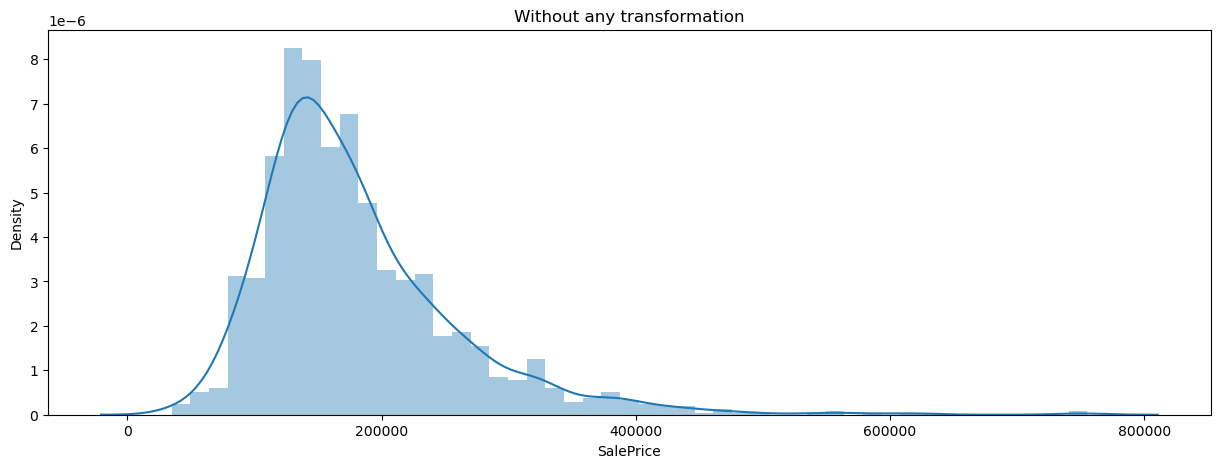

In [78]:
plt.figure(figsize=(15,5))
sns.distplot(house_price['SalePrice'])
plt.title('Without any transformation')

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\3379436557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(house_price['SalePrice']))


Text(0.5, 1.0, 'With log transformation')

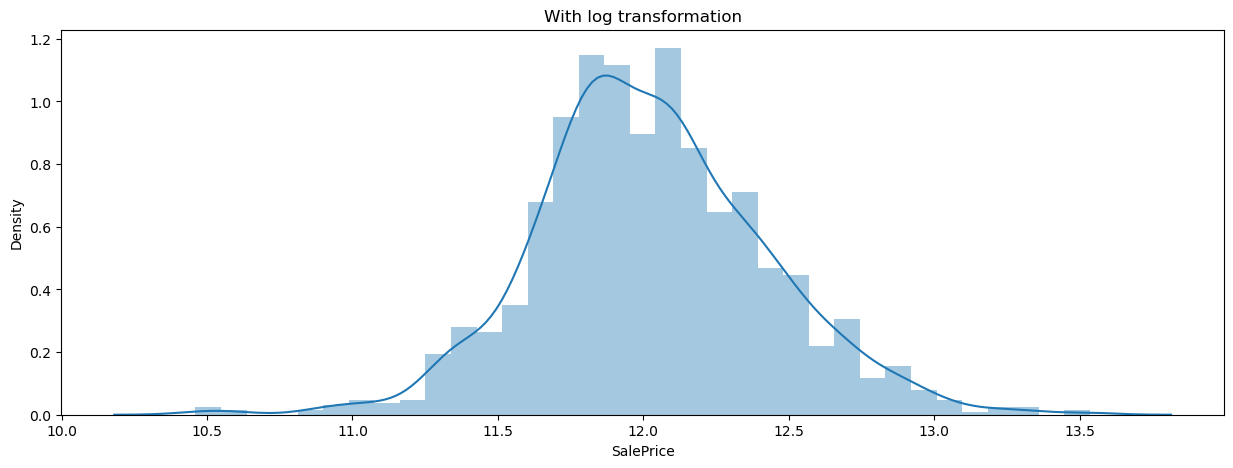

In [79]:
#plotting distribution of 'log(SalePrice)' 
plt.figure(figsize=(15,5))
sns.distplot(np.log(house_price['SalePrice']))
plt.title('With log transformation')

In [80]:
#Lets update the SalePrice columm values

house_price['SalePrice'] = np.log(house_price.SalePrice)
house_price.SalePrice

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\3860141224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price['SalePrice'] = np.log(house_price.SalePrice)


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\1185401358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_price.SalePrice)


<Axes: xlabel='SalePrice', ylabel='Density'>

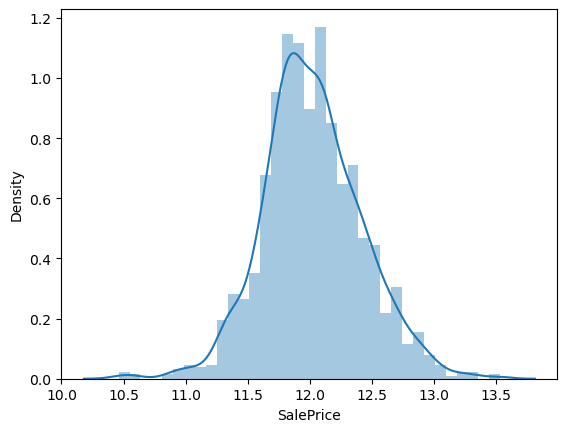

In [81]:
sns.distplot(house_price.SalePrice)

In [82]:
#ncol = house_price.select_dtypes(['int64','float64']).columns
#ncol

In [83]:
#i_25_per = house_price['LotFrontage'].quantile(0.25)
#i_75_per = house_price['LotFrontage'].quantile(0.75)
#IQR = i_75_per - i_25_per
#lower_fence = i_25_per - 1.5 * IQR
#upper_fence = i_75_per + 1.5 * IQR

In [84]:
#Lets check the shape of the dataframe
#house_price.shape

In [85]:
#house_price.shape[0]

In [86]:
#Lets create a backup for the house_price dataframe

#up_house_price = house_price

In [87]:
#for i in ncol:
   # i_25_per = up_house_price[i].quantile(0.25)
    #i_75_per = up_house_price[i].quantile(0.75)
    #IQR = i_75_per - i_25_per
    #lower_fence = i_25_per - 1.5 * IQR
    #upper_fence = i_75_per + 1.5 * IQR
        
    #up_house_price = up_house_price[(up_house_price[i] >= lower_fence) & (up_house_price[i] <= upper_fence)]    

In [88]:
#up_house_price.shape

In [89]:
#Lets check the percentage of the original data after removing the outliers

#up_house_price.shape[0]/house_price.shape[0]*100

In [90]:
house_price.shape

(1459, 47)

In [91]:
#Removing the presence of any duplicates in the dataframe

house_price.drop_duplicates(inplace=True)

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\1784222207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price.drop_duplicates(inplace=True)


In [92]:
#Dataframe shape didnt change, it means there was no duplicate present in the dataframe
house_price.shape

(1459, 47)

### Visualizing the Data

C:\Users\Radhe Krishan\AppData\Local\Temp\ipykernel_10040\532701072.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_price.corr(),annot=True,cmap='YlGnBu')


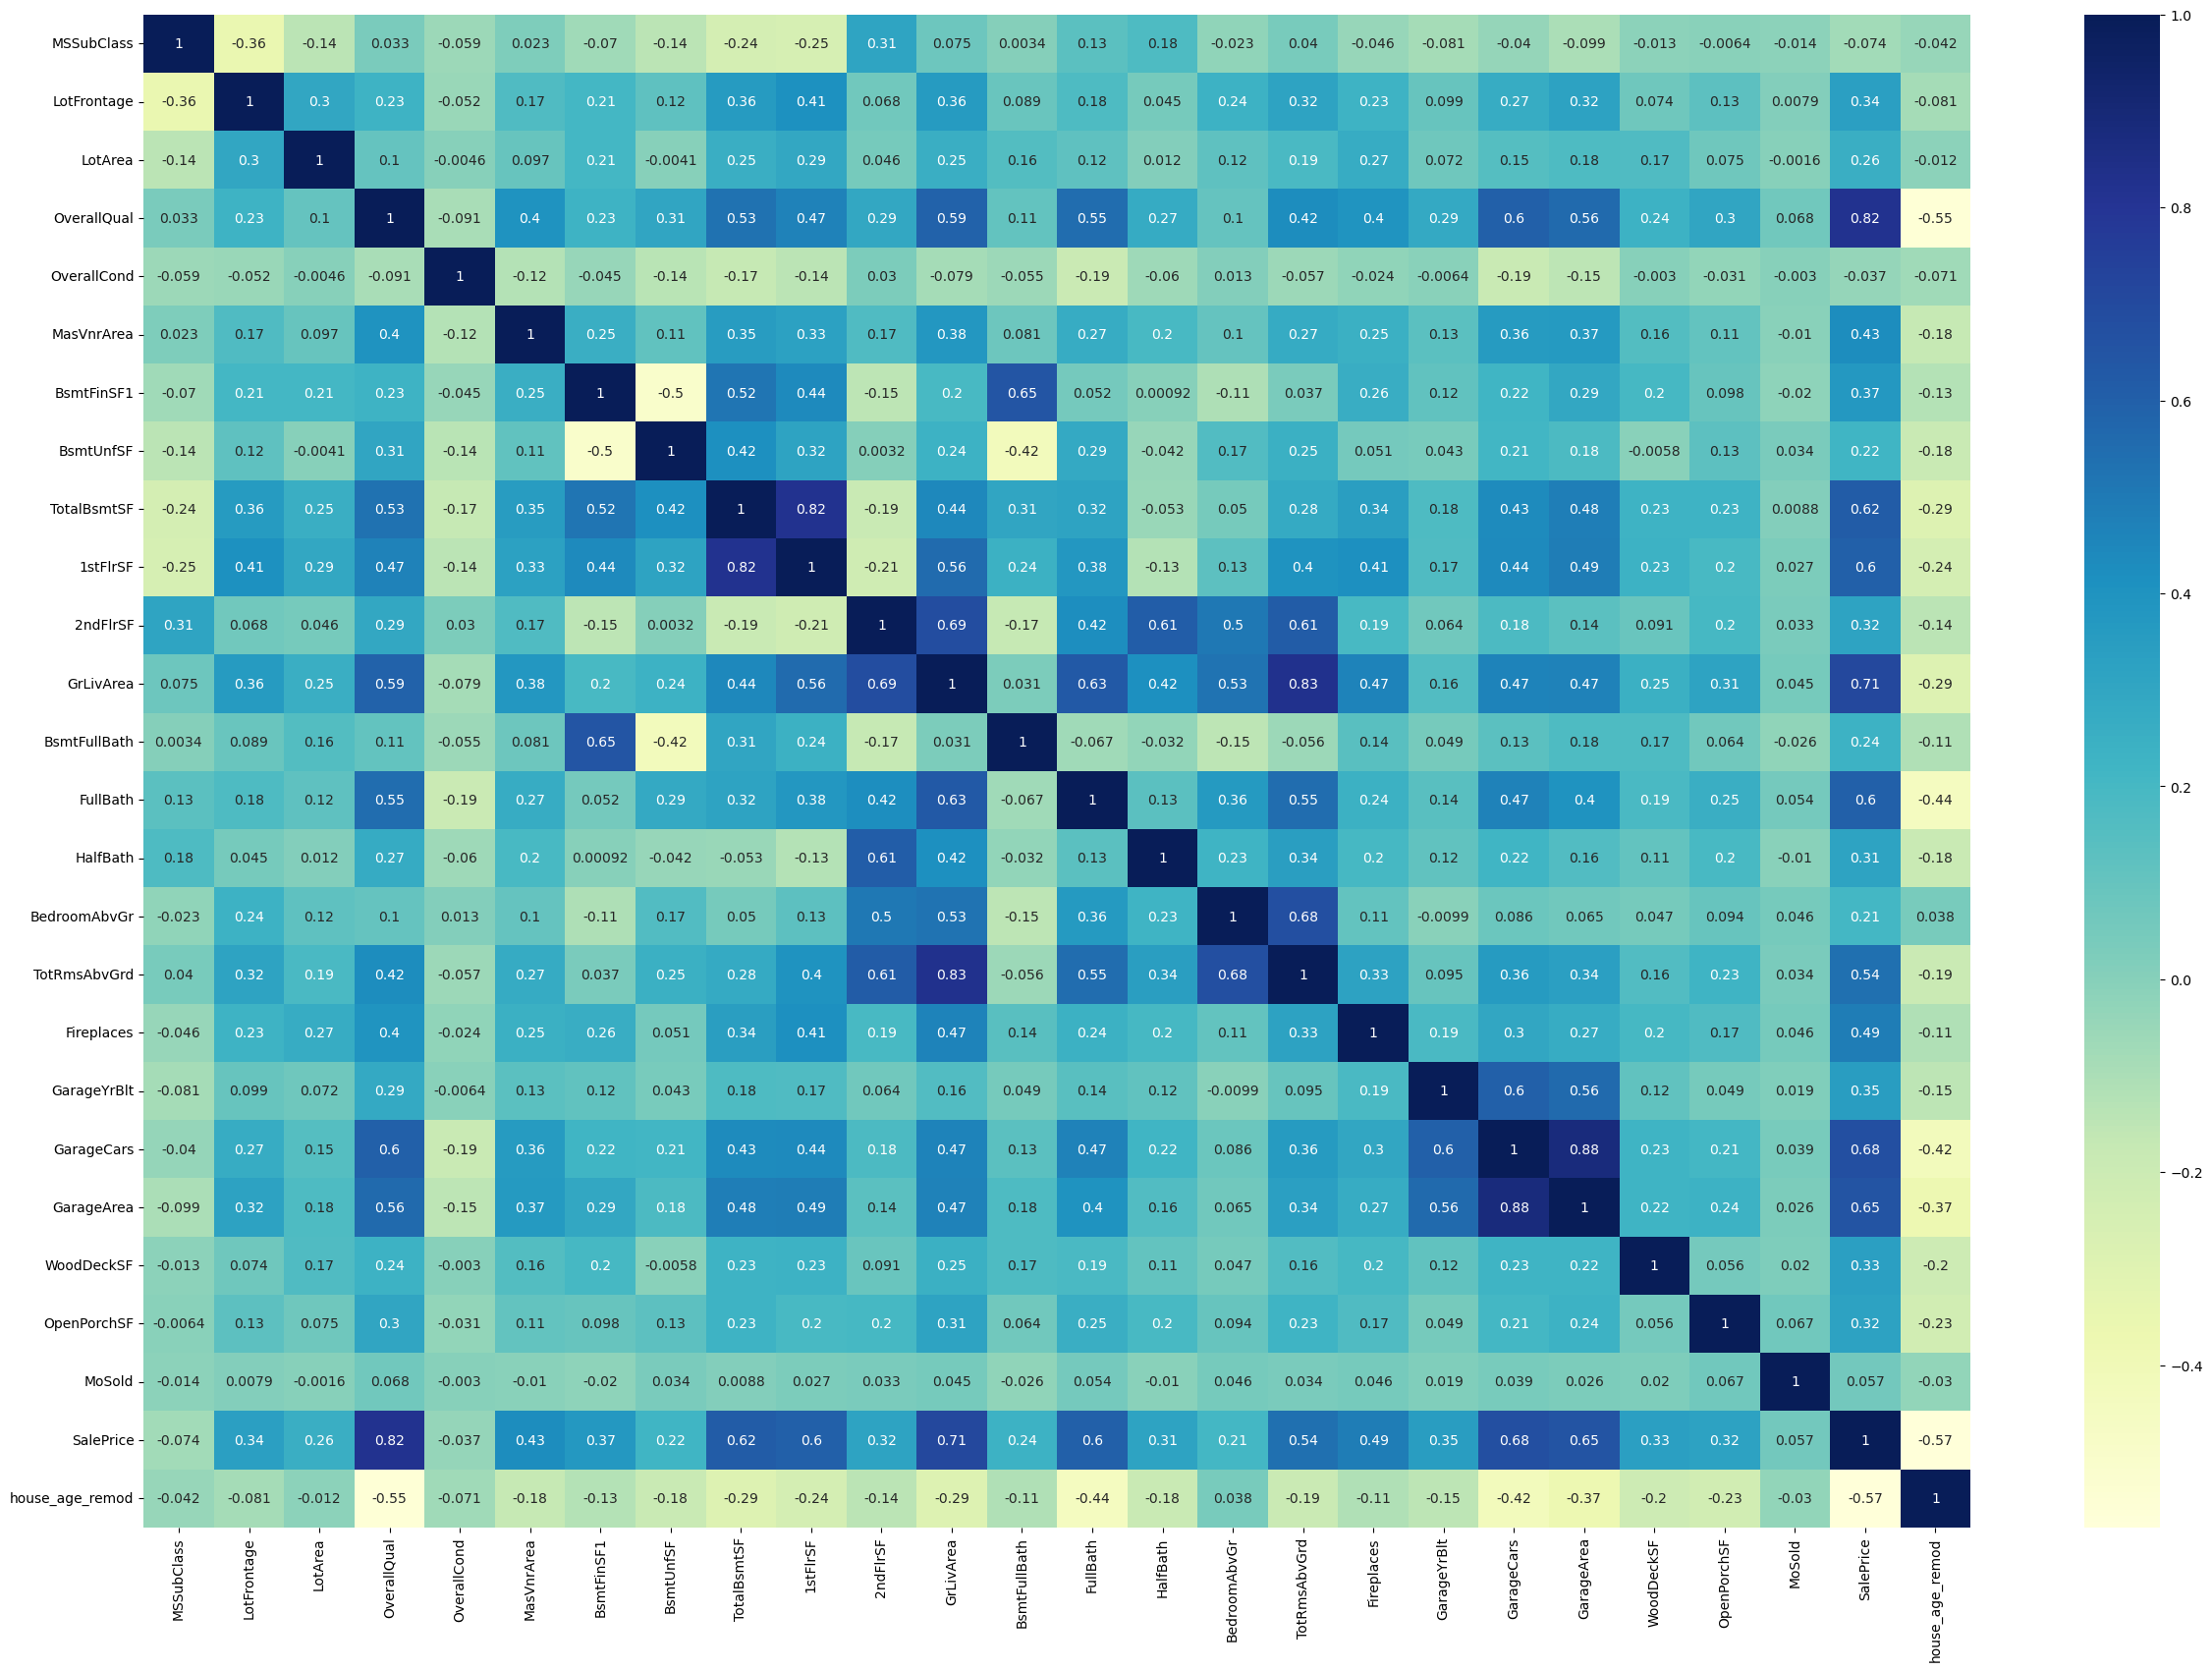

In [93]:
## lets draw a heap map to check the correlation between the numerical columns to see which variables
#are highly correlated.

plt.figure(figsize=(30,20))
sns.heatmap(house_price.corr(),annot=True,cmap='YlGnBu')
plt.show()
            
#cmap="YlGnBu" is an argument used to specify the color map for the heatmap.

# we want to see the correlation of all the variables with SalePrice.

#temp,atemp and yr have strong correlation with cnt.

### Create Dummy Varibales

In [94]:
house_price.shape

(1459, 47)

In [95]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1459 non-null   int64  
 1   MSZoning         1459 non-null   object 
 2   LotFrontage      1459 non-null   float64
 3   LotArea          1459 non-null   int64  
 4   LotShape         1459 non-null   object 
 5   LotConfig        1459 non-null   object 
 6   Neighborhood     1459 non-null   object 
 7   BldgType         1459 non-null   object 
 8   HouseStyle       1459 non-null   object 
 9   OverallQual      1459 non-null   int64  
 10  OverallCond      1459 non-null   int64  
 11  RoofStyle        1459 non-null   object 
 12  Exterior1st      1459 non-null   object 
 13  Exterior2nd      1459 non-null   object 
 14  MasVnrType       1459 non-null   object 
 15  MasVnrArea       1459 non-null   float64
 16  ExterQual        1459 non-null   object 
 17  Foundation    

In [96]:
catvars = house_price.select_dtypes('object').columns
catvars

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [97]:
type(catvars)

pandas.core.indexes.base.Index

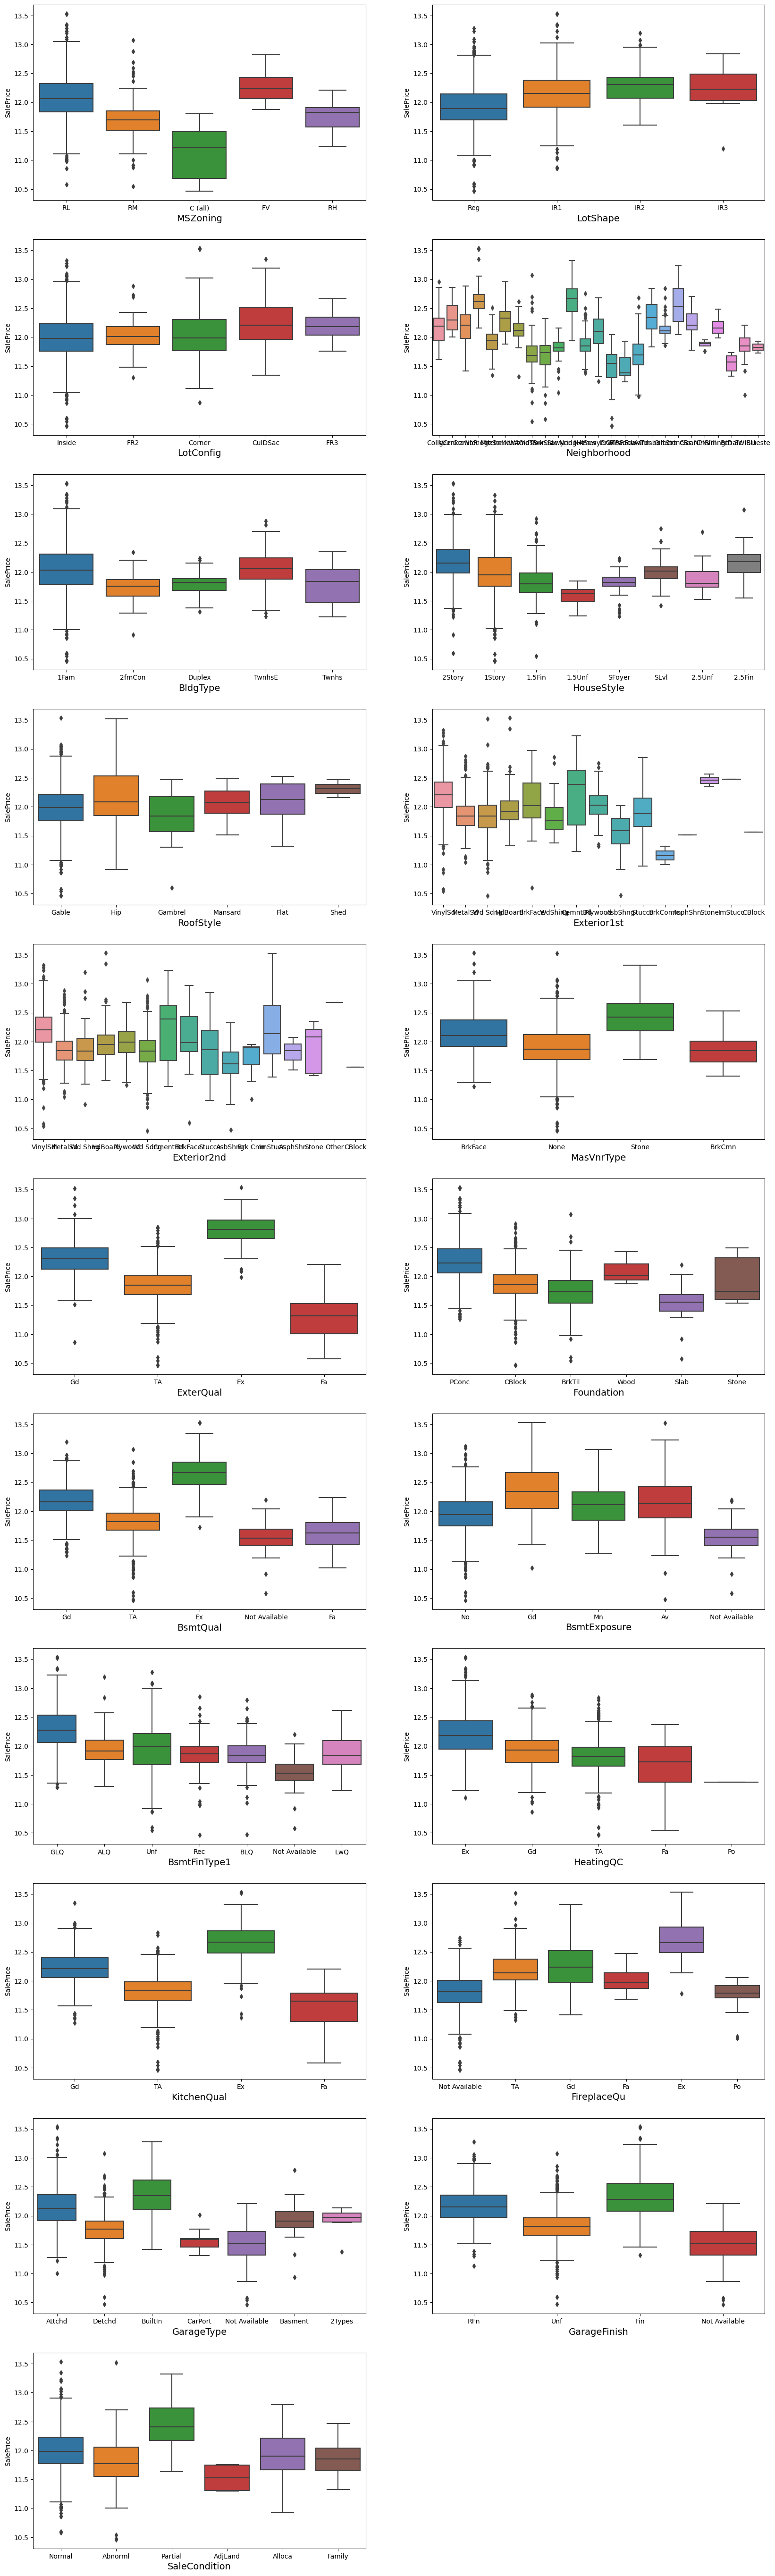

In [98]:
#Creating subplots to Visualize the categorical variables.

#because we want many boxplots within a certain area of the screen, we can 
#create subplots.

plt.figure(figsize=(20,70))
for i,n in enumerate(catvars):
    plt.subplot(11,2,(i+1))
    sns.boxplot(x=n, y='SalePrice',data=house_price)
    plt.xlabel(n, fontsize=14)
plt.show()

In [99]:
numvars = house_price.select_dtypes(['int64','float64']).columns
len(numvars)

26

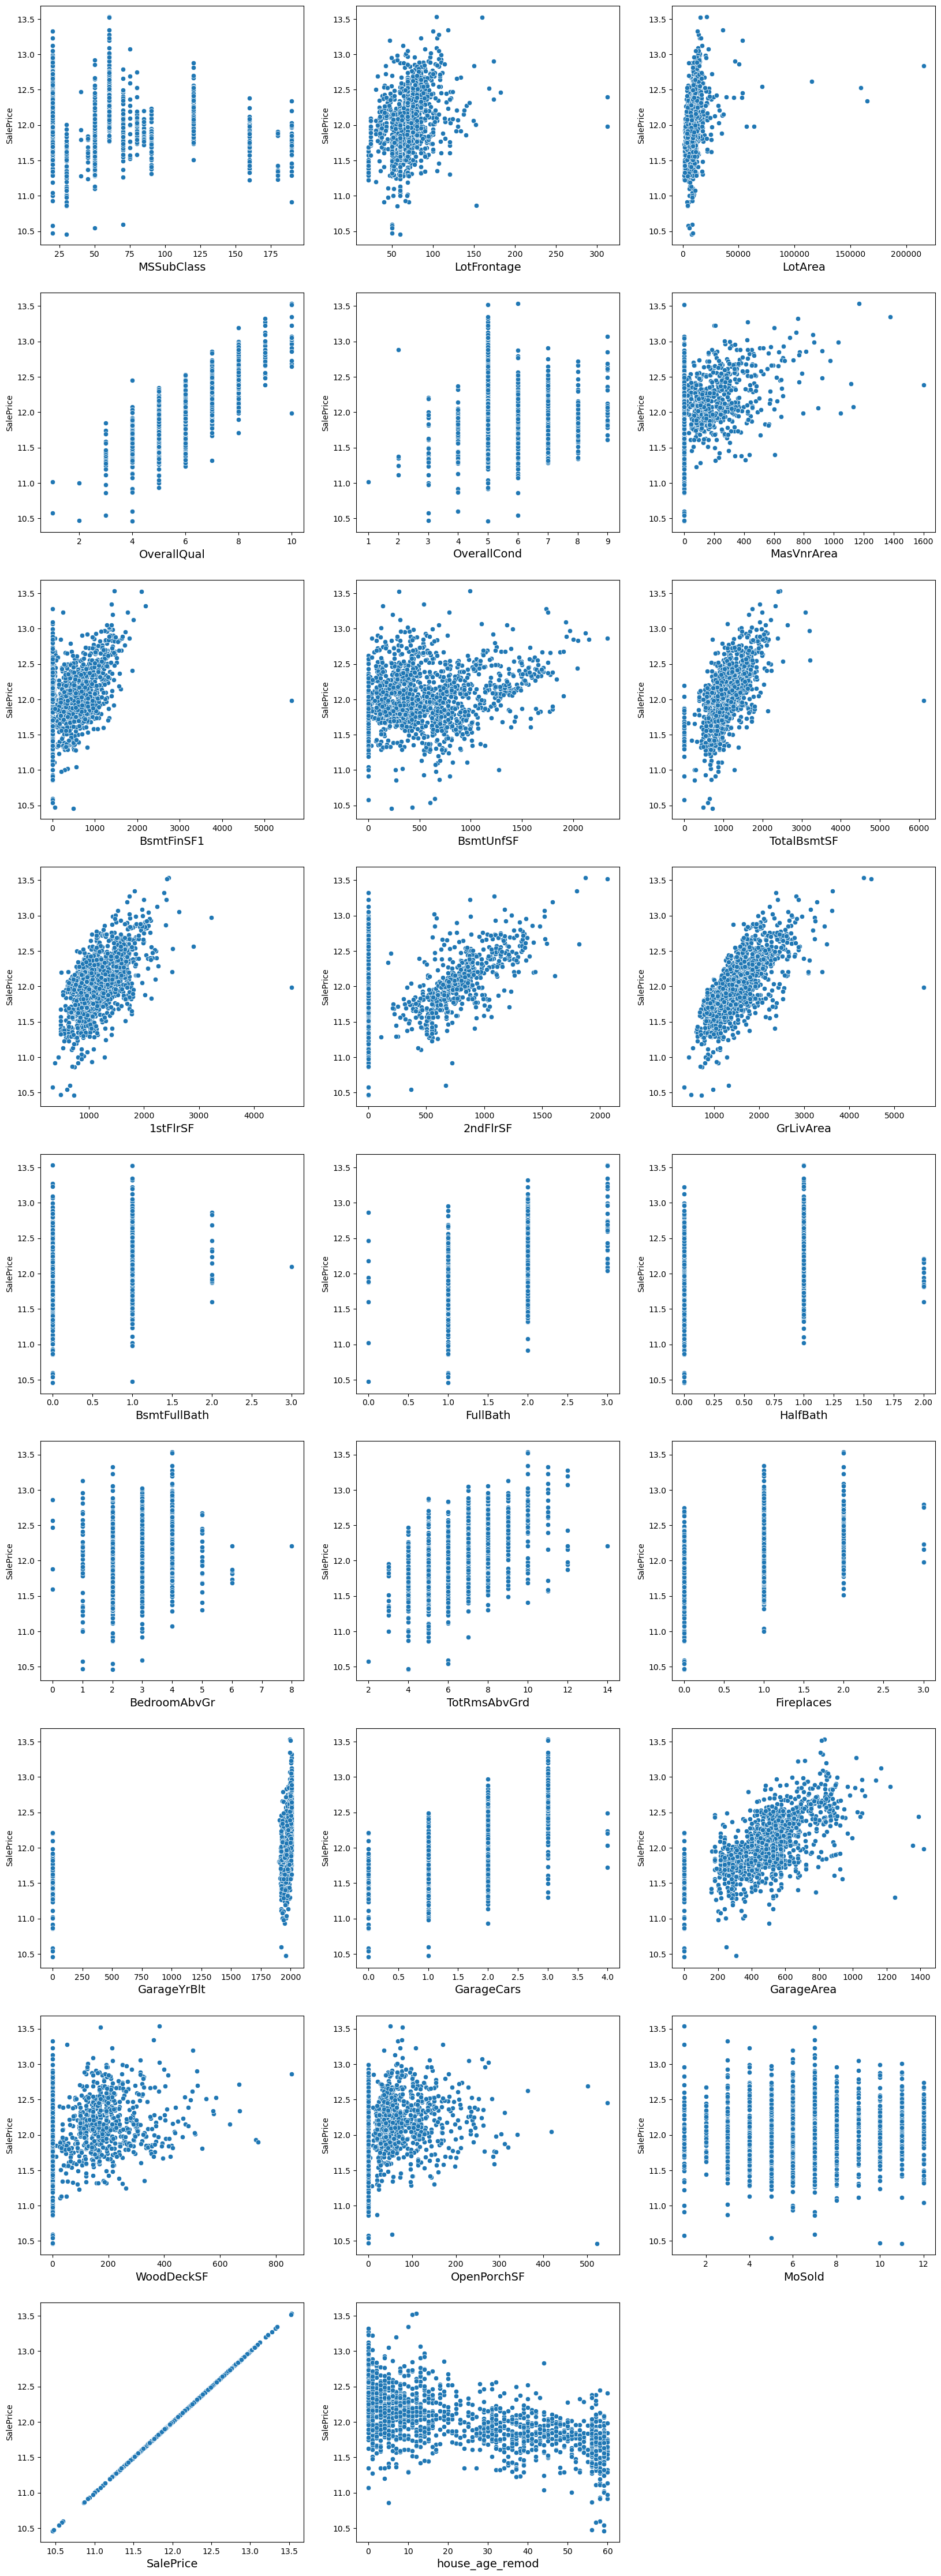

In [100]:
#Lets also check the distribution of target variable 'SalePrice' w.r. to the numerical variables

#because we want many boxplots within a certain area of the screen, we can 
#create subplots.

plt.figure(figsize=(20,70))
for i,n in enumerate(numvars):
    plt.subplot(11,3,(i+1))
    sns.scatterplot(x=n, y='SalePrice',data=house_price)
    plt.xlabel(n, fontsize=14)
plt.show()

#There seems to be have a postive and negative correlation of the predictor variables with the response variable (SalesPrice).

### Lets create dummy variabes for the categorical variables

In [101]:
#Lets create dummy variables for MSZoning

house_price['MSZoning'].value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [102]:
MSZoning_dm = pd.get_dummies(house_price['MSZoning'],drop_first=True,prefix_sep='_',prefix='MSZoning')
MSZoning_dm.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [103]:
#So, we have created the dummy variables. But, the dummy variables are stored in a
#separate dataframes.

#So, we need to join thess dataframes with the original dataframe. The way to do this
#is to concat the dummy dataframes with the original dataframe.

house_price = pd.concat([house_price,MSZoning_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,SalePrice,house_age_remod,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,61,2,Normal,12.247694,5,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,298,0,5,Normal,12.109011,31,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,42,9,Normal,12.317167,6,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,35,2,Abnorml,11.849398,36,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,192,84,12,Normal,12.429216,8,0,0,1,0


In [104]:
#Lets create dummy variable for LotShape

house_price['LotShape'].value_counts()

Reg    925
IR1    483
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [105]:
LotShape_dm = pd.get_dummies(house_price['LotShape'],drop_first=True,prefix_sep='_',prefix = 'LotShape')
house_price = pd.concat([house_price,LotShape_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,SaleCondition,SalePrice,house_age_remod,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,Normal,12.247694,5,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,Normal,12.109011,31,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,Normal,12.317167,6,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,Abnorml,11.849398,36,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,Normal,12.429216,8,0,0,1,0,0,0,0


In [106]:
#Lets create dummy variable for LotConfig
LotConfig_dm = pd.get_dummies(house_price['LotConfig'],drop_first=True,prefix_sep='_',prefix='LotConfig')
house_price = pd.concat([house_price,LotConfig_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,1,0,0,0,0,0,1,0,0


In [107]:
#Lets create dummy variable for Neighborhood

Neighborhood_dm = pd.get_dummies(house_price['Neighborhood'],drop_first=True,prefix_sep='_',prefix='Neighborhood')
house_price = pd.concat([house_price,Neighborhood_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,1,0,0,0,0,0,0,0,0,0


In [108]:
catvars

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [109]:
#Lets create dummy variable for HouseStyle

HouseStyle_dm = pd.get_dummies(house_price['HouseStyle'],drop_first=True,prefix_sep='_',prefix='HouseStyle')
house_price = pd.concat([house_price,HouseStyle_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,0,0,0,1,0,0


In [110]:
#Lets create dummy variable for RoofStyle

RoofStyle_dm = pd.get_dummies(house_price['RoofStyle'],drop_first=True,prefix_sep='_',prefix='RoofStyle')
house_price = pd.concat([house_price,RoofStyle_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,1,0,0,1,0,0,0,0


In [111]:
#Lets create dummy variable for Exterior1st

Exterior1st_dm = pd.get_dummies(house_price['Exterior1st'],drop_first=True,prefix_sep='_',prefix='Exterior1st')
house_price = pd.concat([house_price,Exterior1st_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,0,0,0,1,0,0


In [112]:
#Lets create dummy variable for Exterior2nd

Exterior2nd_dm = pd.get_dummies(house_price['Exterior2nd'],drop_first=True,prefix_sep='_',prefix='Exterior2nd')
house_price = pd.concat([house_price,Exterior2nd_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,0,0,0,1,0,0


In [113]:
Exterior2nd_dm.columns

Index(['Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng'],
      dtype='object')

In [114]:
catvars

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [115]:
#Lets create dummy variable for MasVnrType

MasVnrType_dm = pd.get_dummies(house_price['MasVnrType'],drop_first=True,prefix_sep='_',prefix='MasVnrType')
house_price = pd.concat([house_price,MasVnrType_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,1,0,0,1,0,0


In [116]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 126 entries, MSSubClass to MasVnrType_Stone
dtypes: float64(4), int64(22), object(21), uint8(79)
memory usage: 659.7+ KB


In [117]:
#convert ExterQual, it is a ordered categorical variable

house_price['ExterQual'].value_counts()

TA    906
Gd    488
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [118]:
#Lets map attributes to numbers

house_price['ExterQual'] = house_price['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [119]:
#Lets create dummy variable for Foundation

Foundation_dm = pd.get_dummies(house_price['Foundation'],drop_first=True,prefix_sep='_',prefix='Foundation')
house_price = pd.concat([house_price,Foundation_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,1,0,0,0,1,0,0,0


In [120]:
#Lets cnvert BsmtQual, it is a ordered categorical variable

house_price['BsmtQual'].value_counts()

TA               649
Gd               618
Ex               120
Not Available     37
Fa                35
Name: BsmtQual, dtype: int64

In [121]:
#Lets map attributes to numbers

house_price['BsmtQual'] = house_price['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Not Available':0})

In [122]:
house_price.BsmtQual.value_counts()

3    649
4    618
5    120
0     37
2     35
Name: BsmtQual, dtype: int64

In [123]:
catvars

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [124]:
#Lets cnvert BsmtExposure, it is a ordered categorical variable

house_price.BsmtExposure.value_counts()

No               953
Av               221
Gd               133
Mn               114
Not Available     38
Name: BsmtExposure, dtype: int64

In [125]:
house_price['BsmtExposure'] = house_price['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'Not Available':0})
house_price.BsmtExposure.value_counts()

1    953
3    221
4    133
2    114
0     38
Name: BsmtExposure, dtype: int64

In [126]:
#Lets convert BsmtFinType1, it is also a ordered categorical variable
house_price.BsmtFinType1.value_counts()

Unf              430
GLQ              417
ALQ              220
BLQ              148
Rec              133
LwQ               74
Not Available     37
Name: BsmtFinType1, dtype: int64

In [127]:
house_price['BsmtFinType1'] = house_price['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'Not Available':0})
house_price.BsmtFinType1.value_counts()

1    430
6    417
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [128]:
#HeatingQC,it is also a ordered categorical variable
house_price.HeatingQC.value_counts()

Ex    740
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [129]:
house_price['HeatingQC'] = house_price['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
house_price.HeatingQC.value_counts()

4    740
2    428
3    241
1     49
0      1
Name: HeatingQC, dtype: int64

In [130]:
#KitchenQual, it is also a ordered categorical variable
house_price.KitchenQual.value_counts()

TA    735
Gd    586
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [131]:
house_price['KitchenQual'] = house_price['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
house_price.KitchenQual.value_counts()

2    735
3    586
4     99
1     39
Name: KitchenQual, dtype: int64

In [132]:
catvars

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [133]:
#FireplaceQu, another ordered categorical variable

house_price.FireplaceQu.value_counts()

Not Available    690
Gd               379
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

In [134]:
house_price['FireplaceQu'] = house_price['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Not Available':0})

In [135]:
house_price.FireplaceQu.value_counts()

0    690
4    379
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [136]:
#Lets create dummy variable for GarageType

house_price.GarageType.value_counts()

Attchd           870
Detchd           387
BuiltIn           87
Not Available     81
Basment           19
CarPort            9
2Types             6
Name: GarageType, dtype: int64

In [137]:
GarageType_dm = pd.get_dummies(house_price['GarageType'],drop_first=True,prefix_sep='_',prefix='GarageType')
house_price = pd.concat([house_price,GarageType_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Available
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,1,0,0,0,1,0,0,0,0,0


In [138]:
#Lets create dummy variable for GarageFinish

house_price.GarageFinish.value_counts()

Unf              605
RFn              422
Fin              351
Not Available     81
Name: GarageFinish, dtype: int64

In [139]:
GarageFinish_dm = pd.get_dummies(house_price['GarageFinish'],drop_first=True,prefix_sep='_',prefix='GarageFinish')
house_price = pd.concat([house_price,GarageFinish_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Available,GarageFinish_Not Available,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,0,0,0,0,1,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,1,0,0,0,0,0,0,1,0


In [140]:
#Lets create dummy variable for BldgType

house_price.BldgType.value_counts()

1Fam      1219
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [141]:
BldgType_dm = pd.get_dummies(house_price['BldgType'],drop_first=True,prefix_sep='_',prefix='BldgType')
house_price = pd.concat([house_price,BldgType_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageType_CarPort,GarageType_Detchd,GarageType_Not Available,GarageFinish_Not Available,GarageFinish_RFn,GarageFinish_Unf,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,1,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,1,0,0,0,0,0


In [142]:
#Lets create dummy variable for SaleCondition
house_price.SaleCondition.value_counts()

Normal     1198
Partial     124
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [143]:
SaleCondition_dm = pd.get_dummies(house_price['SaleCondition'],drop_first=True,prefix_sep='_',prefix='SaleCondition')
house_price = pd.concat([house_price,SaleCondition_dm],axis=1)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageFinish_Unf,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,1,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,0,0,0,0,1,0


In [144]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 149 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(29), object(14), uint8(102)
memory usage: 692.5+ KB


In [145]:
#Dummy values for the categorical variables has been created. Lets drop the original variables

house_price.drop(columns=['MSZoning','LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
                           'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                           'Foundation', 'GarageType', 'GarageFinish','BldgType','SaleCondition'],inplace=True)

In [146]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 135 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(29), uint8(102)
memory usage: 532.9 KB


### test-train split and scale the features

Before model building, we first need to perform the test-train split and scale
the features.

Scaling of variables is an important step because, as the outcome variable is on a different
scale with respect<br> to some of the variables, which take very small values. For example,
the categorical variables that we encoded just now<br> take either 0 or 1 as their values.
Also, there are some of the predictors which take values from samll to large. <br>Hence, it is 
important to have everything on the same scale for the model to be easily
interpretable.

### Splitting into train and test

In [147]:
#Lets check the shape of the dataframe

house_price.shape

(1459, 135)

In [148]:
#For splitting into train and test sets, we have imported sklearn.
#and from sklearn.model_selection, we have imported train_test_split

#So, we can use 'train_test_split' to split the dataset into train and test sets.

#In 'train_test_split', we give the name of the dataframe and the size of training set.

df_train,df_test = train_test_split(house_price,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

#It will give two datafreames df_train and df_test

(1021, 135)
(438, 135)


In [149]:
#When building a model, we have to interpret the cofficients. It is extremely 
#important that all these variables are at a comparable scale so that the cofficients
#are also comparable. So, this is the idea of rescaling. Thats one advantage
#of rescaling is interpretability.

#Other advantage of rescaling is that if we scale the variable between (0,1) 
#or sort of that range than some variables are in 1000, some are in 10s, the
#optimization which happens behind the scene become faster.

#Here, the Min-Max scaling (Normalization) is used for rescaling because
#it takes care of outliers. So, if there is an outlier in the original data points,
#they should have been mapped to 1 and other data points should have been between 
#0 and 1.
   
#Min-Max scaling (Normalization) compresses all the data between 0 and 1.
#The max value of the data is 1 anad min value is 0.

#Sklearn comes with a module called preprocessing which has built-in
#class min-max scaler.

#Lets create an object or instantiate an object

scaler = MinMaxScaler()
#syntax - instantiate using (), dont put anything inside the bracket

In [150]:
#We dont want to scale all the variables. We want to scale only numeric variable
#As an example, there are binary variables. Meaning of 0 and 1 in binary variables
#is very clear, 1 means Yes, 0 means No. We can scale binary variables, there is 
#nothing strictly technically wrong with that. If we will scale binary variables,
#there will be interpretability issues.

#So, first, we need to create a list of only numeric variables.


num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
           'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
           'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
           '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
           'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
           'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
           'OpenPorchSF', 'MoSold', 'SalePrice', 'house_age_remod']

In [151]:
#Paradigm of sklearn

#There are 3 methods that come with most of the classes/implementations.

#fit(): when we use fit() on the training set, it will learn/compute xmax, xmin

#After the fit method, if we call transform() method.

#transform() - computes x-xmin/xmax-xmin

#fit leans what has to be done and transform does that.

#fit_transform() -  a single method that can be used to perform the above two tasks.

#We will take training dataset and we will subset the training dataset to
#only include numeric variables, and on this subset of data we will apply
#scaler function as per the below:

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,GarageFinish_Unf,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
985,1.000000,0.291925,0.043987,0.444444,0.500,0.0,0.333333,0.6,0.25,0.833333,...,1,1,0,0,0,0,0,0,1,0
1416,1.000000,0.242236,0.046139,0.333333,0.625,0.0,0.333333,0.6,0.25,0.166667,...,1,1,0,0,0,0,0,0,1,0
390,0.176471,0.180124,0.032409,0.444444,0.875,0.0,0.333333,0.6,0.25,0.500000,...,1,0,0,0,0,0,0,0,1,0
878,0.382353,0.416149,0.048206,0.444444,0.750,0.0,0.333333,0.6,0.75,0.833333,...,1,0,0,0,0,0,0,0,1,0
568,0.176471,0.360248,0.050756,0.777778,0.875,0.0,0.666667,0.8,1.00,1.000000,...,0,0,0,0,0,0,0,0,1,0


In [152]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,GarageFinish_Unf,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
790,0.588235,0.136646,0.007976,0.666667,0.500,0.006875,0.666667,0.8,0.25,1.000000,...,0,0,0,0,1,0,0,0,1,0
425,0.235294,0.242236,0.008893,0.666667,0.875,0.000000,0.333333,0.6,0.25,0.166667,...,1,0,0,0,0,0,0,0,1,0
204,0.176471,0.180124,0.009464,0.444444,0.750,0.000000,0.333333,0.6,0.25,0.333333,...,1,0,0,0,0,0,0,0,1,0
118,0.235294,0.428571,0.050985,0.666667,0.500,0.000000,0.333333,0.8,0.50,1.000000,...,1,0,0,0,0,0,0,0,1,0
244,0.235294,0.298137,0.034631,0.666667,0.500,0.000000,0.666667,0.8,0.25,1.000000,...,0,0,0,0,0,0,0,0,1,0


In [153]:
#As we can see above, the binary variables are still 0's and 1's. ALl the numerical variables
#are mapped to a scale between 0 and 1.

df_train[num_vars].describe()

#We can infact verify if it is indeed between 0 and 1. We can look at all the numerical
#variables and see describe function.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,house_age_remod
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.213055,0.304135,0.043042,0.568615,0.571621,0.065670,0.469801,0.697943,0.407933,0.597780,...,0.205681,0.368462,0.932421,0.446376,0.343145,0.110106,0.086815,0.486689,0.512906,0.382305
std,0.244344,0.128367,0.048731,0.155037,0.136920,0.116907,0.190993,0.175470,0.267470,0.351451,...,0.215738,0.363944,0.220772,0.185904,0.150926,0.148520,0.120616,0.248335,0.132135,0.346838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.028784,0.444444,0.500000,0.000000,0.333333,0.600000,0.250000,0.166667,...,0.000000,0.000000,0.974129,0.250000,0.251799,0.000000,0.000000,0.363636,0.427765,0.066667
50%,0.176471,0.298137,0.037863,0.555556,0.500000,0.000000,0.333333,0.800000,0.250000,0.666667,...,0.333333,0.400000,0.984080,0.500000,0.348201,0.000000,0.051188,0.454545,0.506104,0.233333
75%,0.294118,0.360248,0.047683,0.666667,0.625000,0.100625,0.666667,0.800000,0.500000,1.000000,...,0.333333,0.800000,0.995522,0.500000,0.414388,0.196033,0.127971,0.636364,0.593678,0.683333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
#Lets first create X and y.

#For training, we need X_train and y_train which we are going to create from df_train.

y_train =  df_train.pop('SalePrice') #extract column SalePrice from df_train

X_train = df_train #Whatever else left is the X_train

In [155]:
X_train.shape

(1021, 134)

In [156]:
y_train.value_counts()

0.440041    14
0.451871    13
0.373425    11
0.551207    11
0.427765     9
            ..
0.390841     1
0.460809     1
0.483928     1
0.650092     1
0.606205     1
Name: SalePrice, Length: 538, dtype: int64

In [157]:
y_test = df_test.pop('SalePrice')#extract column SalePrice from df_test
#It will remove the column SalePrice inplace and assign to y_test

X_test = df_test #Whatever else left is the X_test

In [158]:
X_test.shape

(438, 134)

In [159]:
y_test.shape

(438,)

### Model Building

In [160]:
#Using Recursive feature elimination (RFE) for automated variable selection

#Running RFE with output number of variables equal to 15

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [161]:
#Calculating R2 Score

y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

print((r2_score(y_train,y_train_pred)))
print((r2_score(y_test,y_test_pred)))

0.9410558874849115
-6.141683002608338e+22


In [162]:
rfe = RFE(estimator=lm, n_features_to_select=25)  #initializes RFE object
rfe = rfe.fit(X_train, y_train) #fits RFE object to the training data 

In [163]:
#Lets get the list of top 30 selected  variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 100),
 ('LotFrontage', False, 47),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 19),
 ('ExterQual', False, 70),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 4),
 ('BsmtFinType1', False, 45),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 63),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 13),
 ('FullBath', False, 20),
 ('HalfBath', False, 21),
 ('BedroomAbvGr', False, 72),
 ('KitchenQual', False, 38),
 ('TotRmsAbvGrd', False, 62),
 ('Fireplaces', False, 107),
 ('FireplaceQu', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 8),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 18),
 ('OpenPorchSF', False, 41),
 ('MoSold', False, 96),
 ('house_age_remod', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', Fal

In [164]:
#Lets move RFE supported columns to the variable col

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FireplaceQu',
       'GarageYrBlt', 'GarageArea', 'house_age_remod', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'HouseStyle_2.5Fin', 'Exterior1st_BrkComm', 'Exterior1st_Stucco',
       'Exterior2nd_Stucco', 'Foundation_Slab', 'GarageType_Not Available',
       'GarageFinish_Not Available'],
      dtype='object')

In [165]:
#Lets get the columns which are not selected
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'ExterQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'BsmtFullBath', 'FullBath',
       ...
       'GarageFinish_Unf', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=109)

In [166]:
#Lets cretae a datsaset with the above selecetd 25 columns (RFE columns)

X_train_rfe = X_train[col]

In [167]:
#Build model with all the selected columns

#Now, we can proceed with building the model.

#First, we need to import the 'statsmodels.api' library. We can also use 
#Sklearn. We are going to use statsmodels here because we want to look
#p-vales, significance level etc.

#So, the first step is to add the constant because statsmodels api doesnt
#add an intercept by default. So,

X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm) 

#sm.OLS(y_train, X_train_sm) doesnt actually do anything. We havent learn the cofficients yet. We have just
#created an object of OLS class, an instance of OLS class. So, lr is a linear regression object. We will
#store the results such as the cofficients and all the other details in lr_model.

#Lets fit the model
lr_model = lr.fit()

lr_model.summary()
#Sklrean doesnt provide detailed summary results of the regression model like the below which
#statsmodel provides.

#Any P-value less than .05 is low and above .05 is high.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     451.0
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:15:53   Log-Likelihood:                 1881.1
No. Observations:                1021   AIC:                            -3712.
Df Residuals:                     996   BIC:                            -3589.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8993      0.183     -4.918      0.000      -1.258      -0.541
LotArea                        0.1772      0.027      6.595      0.000       0.124       0.230
OverallQual                    0.2156      0.014     15.354      0.000       0.188       0.243
OverallCond                    0.0871      0.011      8.215      0.000       0.066       0.108
BsmtQual                       0.0622      0.013      4.691      0.000       0.036       0.088
BsmtFinSF1                     0.0688      0.007      9.708      0.000       0.055       0.083
TotalBsmtSF                    0.1788      0.023      7.758      0.000       0.134       0.224
1stFlrSF                       0.0806      0.085      0.947      0.344      -0.086       0.248
2ndFlrSF                       0.0914      0.062      1.477      0.140      -0.030       0.213
GrLivArea                      0.1497      0.120      1.243      0.214      -0.087       0.386
FireplaceQu                    0.0337      0.004      7.989      0.000       0.025       0.042
GarageYrBlt                    0.8857      0.187      4.738      0.000       0.519       1.253
GarageArea                     0.0781      0.014      5.692      0.000       0.051       0.105
house_age_remod               -0.0394      0.005     -7.438      0.000      -0.050      -0.029
MSZoning_FV                    0.1600      0.016      9.840      0.000       0.128       0.192
MSZoning_RH                    0.1239      0.019      6.364      0.000       0.086       0.162
MSZoning_RL                    0.1477      0.015      9.753      0.000       0.118       0.177
MSZoning_RM                    0.1080      0.015      7.023      0.000       0.078       0.138
Neighborhood_Crawfor           0.0344      0.008      4.523      0.000       0.019       0.049
HouseStyle_2.5Fin             -0.0807      0.029     -2.783      0.005      -0.138      -0.024
Exterior1st_BrkComm           -0.1102      0.028     -3.923      0.000      -0.165      -0.055
Exterior1st_Stucco             0.0320      0.017      1.891      0.059      -0.001       0.065
Exterior2nd_Stucco            -0.0469      0.017     -2.746      0.006      -0.080      -0.013
Foundation_Slab                0.0764      0.013      5.851      0.000       0.051       0.102
GarageType_Not Available       0.4246      0.091      4.681      0.000       0.247       0.603
GarageFinish_Not Available     0.4246      0.091      4.681      0.000       0.247       0.603
==============================================================================
Omnibus:                      127.426   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              404.894
Skew:                          -0.606   Prob(JB):                     1.20e-88
Kurtosis:   

### Checking VIF

In [168]:
#Because we have to look at VIF along with the p-values, lets calculate VIF

vif = pd.DataFrame() #creates an empty DataFrame and assigns it to the variable vif
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,GarageFinish_Not Available,inf
23,GarageType_Not Available,inf
8,GrLivArea,868.50
6,1stFlrSF,433.20
10,GarageYrBlt,234.04
7,2ndFlrSF,190.55
15,MSZoning_RL,122.47
3,BsmtQual,58.70
5,TotalBsmtSF,46.34
1,OverallQual,45.10


In [169]:
#Compute VIF

#We will use variance_inflation_factor method to compute VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame() #creates an empty DataFrame and assigns it to the variable vif
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,GarageFinish_Not Available,inf
23,GarageType_Not Available,inf
8,GrLivArea,868.50
6,1stFlrSF,433.20
10,GarageYrBlt,234.04
7,2ndFlrSF,190.55
15,MSZoning_RL,122.47
3,BsmtQual,58.70
5,TotalBsmtSF,46.34
1,OverallQual,45.10


### Ridge Regression

In [170]:
# list of alphas to tune

# high alpha value - underfitting
# too low - will not handle the overfitting


params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [171]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 0.9}


In [186]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.74219173e-02  2.01190103e-02  8.01544543e-02  1.52676274e-01
  8.74846164e-02  1.15802605e-02 -2.44017673e-03  2.12350742e-02
  2.16804529e-02  1.38648739e-02  4.09005246e-02  6.21778708e-03
  1.10183179e-01  1.73941134e-02  9.58152082e-02  8.17852411e-02
  1.10802808e-01  2.73442289e-02  2.33420360e-02  2.12851276e-02
 -4.11765584e-03  2.19417754e-02  2.34913963e-02  3.64982954e-03
  1.91482778e-02  8.15932947e-03  1.75215905e-02  5.83429669e-02
  2.59114134e-02  1.47580198e-02 -2.43346634e-03 -2.04513681e-02
  7.45463110e-02  5.63290452e-02  7.67160010e-02  6.76598509e-02
  4.93566059e-03  5.26208301e-03  3.94057478e-03  9.46126262e-03
 -1.19327879e-02 -9.36895540e-03 -1.06295267e-03  4.50077665e-03
 -2.25097312e-02  9.93257678e-05  1.74983554e-02  6.21813181e-04
  3.76735632e-02 -2.05422596e-02  3.17934383e-03 -2.74254915e-02
 -3.82215844e-02 -6.62404102e-04 -8.21189236e-03  5.53694456e-03
 -1.06312604e-02  1.57959077e-02  2.69470828e-02 -3.43061883e-02
 -3.41970732e-03 -1.36539

In [187]:
# Lets calculate R2 score
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [188]:
r2_train_score = r2_score(y_train, y_pred_train)
print(r2_train_score)

0.9391719594571444


In [189]:
r2_test_score = r2_score(y_test, y_pred_test)
print(r2_test_score)

0.7886717232167322


### Lasso Regression

In [176]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 1, 10, 100, 500, 1000]}

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 10, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [177]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [180]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [190]:
#Lets calculate R-squared value for training and test data

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Lets calculate R2 score

print("R2 score on training data: ",r2_score(y_train, y_train_pred))

print("R2 score on test data: ",r2_score(y_test, y_test_pred))

R2 score on training data:  0.9353409352004755
R2 score on test data:  0.7886287392981539


In [191]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [192]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
4,OverallCond,0.152676
17,BsmtFullBath,0.110803
13,HeatingQC,0.110183
15,2ndFlrSF,0.095815
5,MasVnrArea,0.087485
16,GrLivArea,0.081785
3,OverallQual,0.080154
35,MSZoning_RM,0.076716
33,MSZoning_RH,0.074546
36,LotShape_IR2,0.067660
